In [7]:
# Creating a radar chart for Krystian Bielik
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

league_one = pd.read_csv("league_one.csv") 

In [28]:
league_one['Position'] = league_one['Position'].str.strip().str.upper()

# Filter rows where 'CB' appears anywhere in 'Position'
league_one_cb = league_one[
    league_one['Position'].str.contains('CB', na=False)
]

# Define Parameters
params = [
    'Player', 'Team', 'Successful defensive actions per 90', 'Defensive duels per 90', 'Defensive duels won, %', 
    'Aerial duels per 90', 'Aerial duels won, %', 'PAdj Interceptions', 'Fouls per 90',
    'Yellow cards per 90', 'Progressive runs per 90', 'Passes per 90', 'Accurate passes, %', 'Forward passes per 90', 'Accurate forward passes, %', 'Average pass length, m',
    'Progressive passes per 90', 'Accurate progressive passes, %'
]

league_one_cb_filtered = league_one_cb[params]
params = params[2:]
league_one_cb

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
3,C. Klarer,Birmingham City,Birmingham City,RCB,24.0,3000000,30/06/2027,14,1390,0,...,NaN,4.60,NaN,NaN,0.06,0.0,0.0,0.00,0,0.0
6,K. Bielik,Birmingham City,Birmingham City,LCB,26.0,2500000,30/06/2027,11,1016,1,...,NaN,3.10,NaN,NaN,0.00,0.0,0.0,0.00,0,0.0
7,M. Helik,Huddersfield Town,Huddersfield Town,CB,29.0,2200000,30/06/2025,10,792,1,...,NaN,1.36,NaN,NaN,0.00,0.0,0.0,0.00,0,0.0
11,D. Pines,Barnsley,Barnsley,"CB, RCB",26.0,1700000,30/06/2025,11,559,1,...,NaN,1.93,NaN,NaN,0.00,0.0,0.0,0.00,0,0.0
12,L. Chambers,Wigan Athletic,Wigan Athletic,"LB, LCB",20.0,1500000,31/05/2025,10,927,1,...,NaN,0.19,NaN,NaN,1.26,0.1,100.0,2.04,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,C. Barker,Crawley Town,Crawley Town,"LCB, RCB",21.0,0,30/06/2025,10,830,0,...,NaN,1.95,NaN,NaN,0.11,0.0,0.0,0.00,0,0.0
312,E. Fernandez,Peterborough United,Peterborough United,"RCB, LCB",23.0,0,NaN,15,1410,4,...,NaN,2.81,NaN,NaN,0.00,0.0,0.0,0.00,0,0.0
331,B. Spencer,Huddersfield Town,Huddersfield Town,"RWB, LCB, RCB",20.0,0,NaN,13,933,0,...,NaN,0.87,NaN,NaN,0.00,0.0,0.0,0.10,0,0.0
336,J. Kerr,Wigan Athletic,Wigan Athletic,RCB,27.0,0,NaN,16,1572,0,...,NaN,1.49,NaN,NaN,0.00,0.0,0.0,0.00,0,0.0


In [29]:
# Filter for Bielik Data
player = league_one_cb_filtered.loc[league_one_cb_filtered['Player']=='K. Bielik'].reset_index()
player = list(player.loc[0])
player = player[3:]
player

[10.54,
 5.94,
 71.64,
 8.59,
 69.07,
 12.26,
 1.51,
 0.27,
 2.66,
 89.2,
 93.74,
 32.69,
 88.08,
 20.56,
 12.4,
 82.14]

In [30]:
# Calculate Percentile Values
  
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(league_one_cb_filtered[params[x]],player[x])))

round(stats.percentileofscore(league_one_cb_filtered[params[0]],player[0]))

81

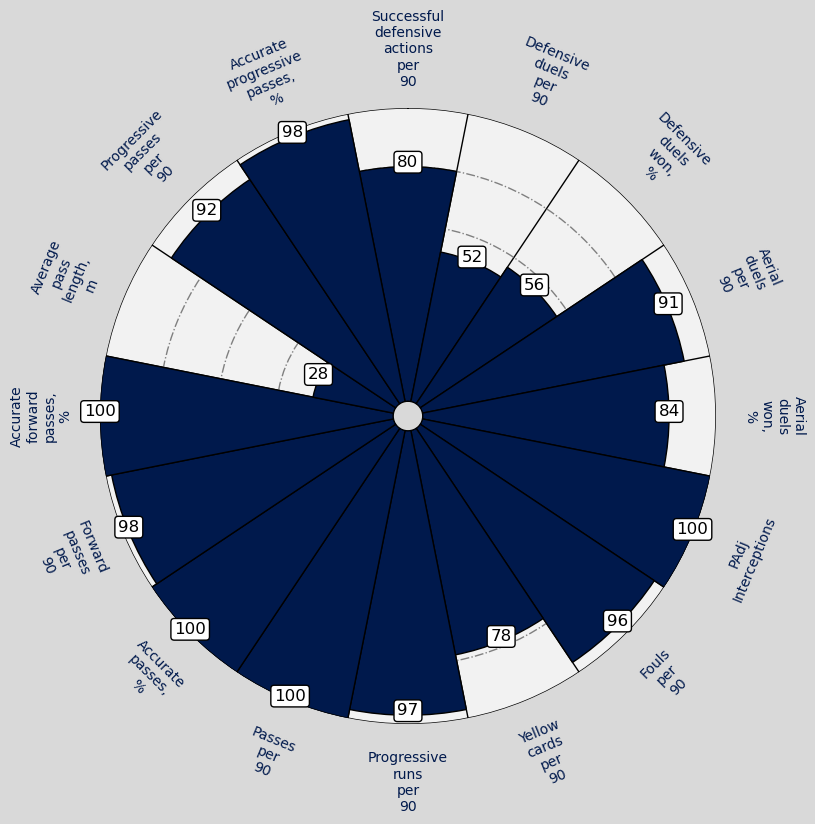

In [31]:
params = [param.replace(" ", "\n") for param in params]   # Align parameter labels

baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=120,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#00194C", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#00194C", fontsize=10,
        va="center", alpha=1.0
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FFFFFF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)
fig.patch.set_facecolor('#D9D9D9') 
plt.savefig('bielik_radar.png',dpi=500,bbox_inches = 'tight')